# Logistic Regression 

## Import Dependencies

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Load data
train_path = "Titanic_train.csv"
test_path = "Titanic_test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [30]:
# Drop unimportant columns
drop_cols = ["Name", "Ticket", "Cabin"]
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [32]:
# Handle missing values using fillna
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)


In [34]:
# Encode categorical variables
encoder_sex = LabelEncoder()
encoder_embarked = LabelEncoder()

train_df["Sex"] = encoder_sex.fit_transform(train_df["Sex"])
test_df["Sex"] = encoder_sex.transform(test_df["Sex"])

train_df["Embarked"] = encoder_embarked.fit_transform(train_df["Embarked"])
test_df["Embarked"] = encoder_embarked.transform(test_df["Embarked"])

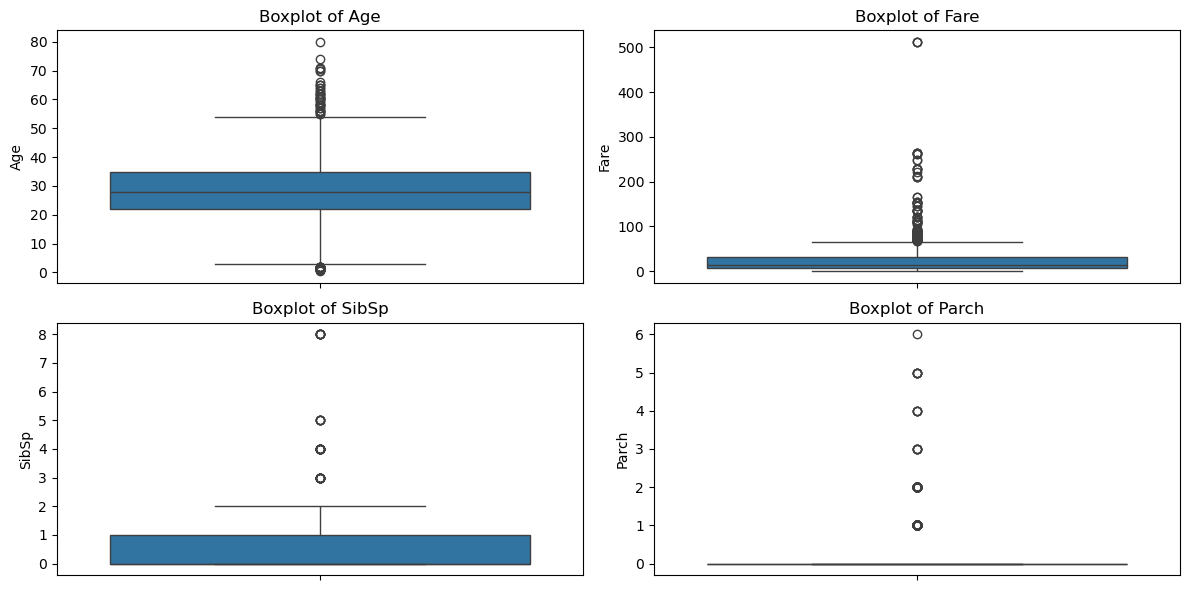

In [36]:
# Outlier detection using Box Plot
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [38]:
# Outlier handling using Winsorization
def winsorize_outliers(df, column, limits=(0.05, 0.05)):
    df[column] = winsorize(df[column], limits=limits)

for col in numeric_cols:
    winsorize_outliers(train_df, col)

In [40]:
# Define features and target
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]


In [42]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
# Save model using pickle
with open("logistic_regression_titanic.pkl", "wb") as file:
    pickle.dump(model, file)